# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel. 

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


--- 
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [45]:
# importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [46]:
# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv')
usage = pd.read_csv('/datasets/usage.csv')

In [47]:
# mostrar las primeras 5 filas de plans
plans.head()

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [48]:
# mostrar las primeras 5 filas de users
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [49]:
# mostrar las primeras 5 filas de usage
usage.head()

,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [50]:
# revisar el número de filas y columnas de cada dataset
print("plans", plans.shape)
print("users", users.shape)
print("usage", usage.shape)

plans (2, 8)
users (4000, 8)
usage (40000, 6)


In [51]:
# inspección de plans con .info()
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [52]:
# inspección de users con .info()
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [53]:
# inspección de usage con .info()
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [54]:
# cantidad de nulos para users
print(users.isna().sum())
print(users.isna().mean())

user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64
user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.00000
city          0.11725
reg_date      0.00000
plan          0.00000
churn_date    0.88350
dtype: float64


In [55]:
# cantidad de nulos para usage
print(usage.isna().sum())
print(usage.isna().mean())

id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64
id          0.00000
user_id     0.00000
type        0.00000
date        0.00125
duration    0.55190
length      0.44740
dtype: float64


✍️ **Comentario**: Incluir conclusiones, qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos. 
 
 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?  
- Indica qué harías: ¿imputar, eliminar, ignorar?

**Dataset users**
- Columna city:
     a) 469 datos faltantes (11,7%)
     b) Se dejará como nulos, ya que no se puede inferir la ciudad del resto de los datos
- Columna churn_date:
     a) 3534 datos faltantes (88%)
     b) Se dejará como nulos. Son clientes que todavía permanecen en la compañía (no tienen fecha de cancelación)

**Dataset usage**
- Columna date:
     a) 50 datos faltantes (0,01%)
     b) Se imputará con la mediana para no alterar análisis estadístico ni perder esos datos.
- Columna duration lenght:
     a) 22.076 datos faltantes (55%)
     b) se investigará para dejar como nulos; lo más probable es que sean de registros de mensajes de texto enviados (los cuales no tienen duration lenght)
- Columna lenght:
     a) 17.896 datos faltantes (44%)
     b) se investigará para dejar como nulos; lo más probable es que sean de registros de llamadas realizadas (los cuales no tienen lenght)
  Nota: la columna "length" tiene un error tipográfico. Lo correcto es "lenght"

### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [56]:
# explorar columnas numéricas de users
numeric_cols_users=["user_id","age"]
users[numeric_cols_users].describe()

,user_id,age
count,4000.000000,4000.000000
mean,11999.500000,33.739750
std,1154.844867,123.232257
min,10000.000000,-999.000000
25%,10999.750000,32.000000
50%,11999.500000,47.000000
75%,12999.250000,63.000000
max,13999.000000,79.000000


- La columna `user_id` tiene 4.000 valores únicos (100.000 al 13.999)
- La columna `age` tiene sentinel -999

In [57]:
# explorar columnas numéricas de usage
numeric_cols_usage =["id","user_id"]
usage[["id","user_id"]].describe()

,id,user_id
count,40000.00000,40000.000000
mean,20000.50000,12002.405975
std,11547.14972,1157.279564
min,1.00000,10000.000000
25%,10000.75000,10996.000000
50%,20000.50000,12013.000000
75%,30000.25000,13005.000000
max,40000.00000,13999.000000


- La columna `id` tiene 4.000 valores únicos (1 al 4.000). No tiene sentinels
- La columna `user_id`tiene 4.000 valores únicos (10.000 al 13.999). No tiene sentinels

In [58]:
# explorar columnas categóricas de users
columnas_user = ['city', 'plan']
users[columnas_user].describe()

,city,plan
count,3531,4000
unique,7,2
top,Bogotá,Basico
freq,808,2595


- La columna `city`, con 3.531 registros, tiene 7 valores únicos. Bogotá es la más frecuente con 808 registros.
- La columna `plan`, con 4.000 registros, tiene 2 valores únicos, siendo el más frecuente el plan Básico con 2.595 registros.

In [59]:
# explorar columna categórica de usage
usage['type'].describe()

count     40000
unique        2
top        text
freq      22092
Name: type, dtype: object

- La columna `type`, con 40.000 registros, tiene dos valores únicos, siendo text el más frecuente con 22.092


---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso. 

**Valores inválidos o sentinels**  
- ¿En qué columnas encontraste valores inválidos o sentinels?  En columna age se encontró valor -999 como sentinel
- ¿Qué acción tomarías?  Se imputará la mediana para no afectar las estadísticas. Media y mediana no son similares (33 vs 47), por eso se decide por mediana.

### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [60]:
# Convertir a fecha la columna `reg_date` de users
users['reg_date'] = pd.to_datetime(users['reg_date'],errors="coerce")

In [61]:
# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage['date'],errors="coerce")

In [62]:
# Revisar los años presentes en `reg_date` de users
users["reg_date"].dt.year.value_counts().sort_index()

2022    1314
2023    1316
2024    1330
2026      40
Name: reg_date, dtype: int64

En `reg_date`:
- La cantidad de usuarios se mantiene estable a lo largo del tiempo (2022 a 2024)
- Existen 40 errores de registros del año 2026.

In [63]:
# Revisar los años presentes en `date` de usage
usage["date"].dt.year.value_counts().sort_index()

2024.0    39950
Name: date, dtype: int64

En date:
- Todos los registros son del año 2024 (39.950), a excepción de 50 registros nulos.

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Fechas fuera de rango**  
- ¿Aparecen años imposibles? Aparecen 40 errores de registros del año 2026 en dataset users columna reg_date
- ¿Qué harías con ellas? Se recomienda eliminarlos para no alterar análisis estadístico. No se puede imputar el año de acuerdo al resto de variables. Representan el 1% de registros. 

---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [64]:
# Reemplazar -999 por la mediana de age
age_mediana = users["age"].median()
users['age'] = users["age"].replace(-999,age_mediana)

# Verificar cambios
users['age'].describe()

count    4000.000000
mean       48.122250
std        17.690408
min        18.000000
25%        33.000000
50%        47.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

In [65]:
# Reemplazar ? por NA en city en dataset users
users["city"]=users["city"].replace("?",pd.NA)
users["city"]=users["city"].fillna(pd.NA)

In [66]:
# Verificar cambios
users["city"].value_counts(dropna=False)

Bogotá      808
CDMX        730
Medellín    616
NaN         565
GDL         450
Cali        424
MTY         407
Name: city, dtype: int64

In [67]:
#Marcar fechas futuras como NA para reg_date en dataset users
users.loc[users["reg_date"].dt.year==2026,"reg_date"]=np.nan


# Verificar cambios
users["reg_date"].dt.year.value_counts(dropna=False).sort_index()


2022.0    1314
2023.0    1316
2024.0    1330
NaN         40
Name: reg_date, dtype: int64

### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length`en usage son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [68]:
# Verificación MAR en usage (Missing At Random) para duration
usage["duration"].isna().groupby(usage["type"]).mean()

type
call    0.000000
text    0.999276
Name: duration, dtype: float64

In [69]:
# Verificación MAR en usage (Missing At Random) para length
usage["length"].isna().groupby(usage["type"]).mean()

type
call    0.99933
text    0.00000
Name: length, dtype: float64

Haz doble clic aquíy escribe que tu diagnostico de nulos en `duration` y `length`
-Los nulos tanto en duration y lenght dependen de la columna type:
  a) en el caso de duration, los nulos se encuentran en 99,9% en text (lo cual es normal: los mensajes de texto no se miden por duración)
  b) en el caso de lenght, los nulos se encuentran en 99,9% en call (lo cual es normal: las llamadas no se miden por longitud del texto)

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico. 

**Instrucciones:**: 
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [70]:
# Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas


# Agrupar información por usuario
usage_agg = usage.groupby('user_id').agg({'is_text' : 'sum','is_call': 'sum','duration' :'sum'}).reset_index()

# observar resultado
usage_agg.head(3)

,user_id,is_text,is_call,duration
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [71]:
# Renombrar columnas
usage_agg=usage_agg.rename(columns={'is_text':'cant_mensajes','is_call':'cant_llamadas','duration':'cant_minutos_llamada'})
# observar resultado
usage_agg.head(3)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [72]:
users.columns

Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan',
       'churn_date'],
      dtype='object')

In [73]:
# Combinar la tabla agregada con el dataset de usuarios
user_profile = pd.merge(usage_agg,users, on='user_id',how='left')
user_profile.head(5)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,7,3,23.70,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,5,10,33.18,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,5,2,10.74,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,11,3,8.99,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,4,3,8.01,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [74]:
# Resumen estadístico de las columnas numéricas
numericas_users=['user_id','age']
users[numericas_users].describe()

,user_id,age
count,4000.000000,4000.000000
mean,11999.500000,48.122250
std,1154.844867,17.690408
min,10000.000000,18.000000
25%,10999.750000,33.000000
50%,11999.500000,47.000000
75%,12999.250000,63.000000
max,13999.000000,79.000000


In [75]:
# Distribución porcentual del tipo de plan
users['plan'].value_counts(normalize=True)

Basico     0.64875
Premium    0.35125
Name: plan, dtype: float64

---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada` 

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda) 

**Hint**  
Para cada histograma, 
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

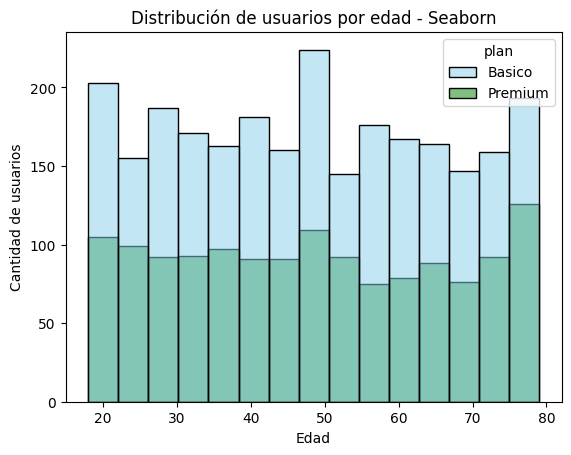

In [76]:
# Histograma para visualizar la edad (age)


sns.histplot(data=users,x='age',bins=15,hue='plan',palette=['skyblue','green'])
plt.xlabel('Edad')
plt.ylabel('Cantidad de usuarios')
plt.title('Distribución de usuarios por edad - Seaborn')
plt.show()



💡Insights: 
- La  distribución es simétrica, destacando el grupo de 45 a 55 años con mayor cantidad de usuarios.
- La distribución entre los planes Básico y Premium es uniforme en todos los rangos etarios, manteniéndose aproximadamente en un 50% para cada uno

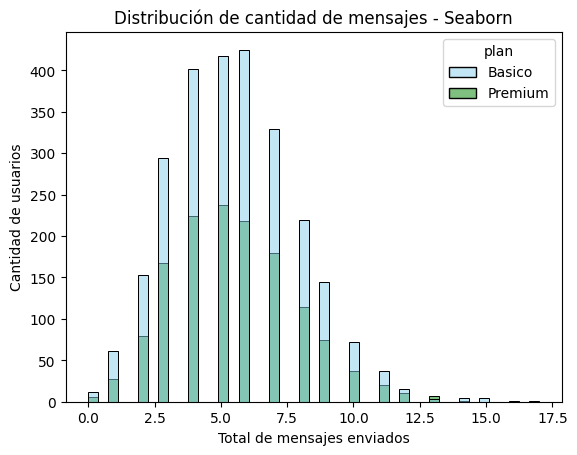

In [77]:
# Histograma para visualizar la cant_mensajes
sns.histplot(data=user_profile, x='cant_mensajes',hue='plan',palette=['skyblue','green'])
plt.xlabel('Total de mensajes enviados')
plt.ylabel('Cantidad de usuarios')
plt.title('Distribución de cantidad de mensajes - Seaborn')
plt.show()

💡Insights: 
- La distribución de la cantidad de mensajes es normal, con una concentración en el total de mensajes enviados de 5.0 a 7.0
- La distribución entre los planes Básico y Premium es uniforme entre el total de mensajes enviados, manteniéndose aproximadamente en un 50% para cada uno

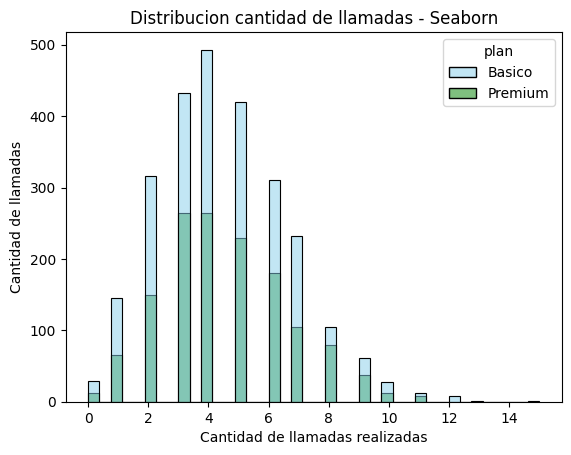

In [78]:
# Histograma para visualizar la cant_llamadas
sns.histplot(data=user_profile, x='cant_llamadas',hue='plan',palette=['skyblue','green'])
plt.title('Distribucion cantidad de llamadas - Seaborn')
plt.xlabel('Cantidad de llamadas realizadas')
plt.ylabel('Cantidad de llamadas')
plt.show()

💡Insights: 
- La distribución de la cantidad de llamadas realizadas presenta un comportamiento aproximadamente normal, con una marcada concentración en cuatro llamadas.
- La distribución entre los planes Básico y Premium es uniforme entre el total de llamdas realizadas, manteniéndose aproximadamente en un 50% para cada uno

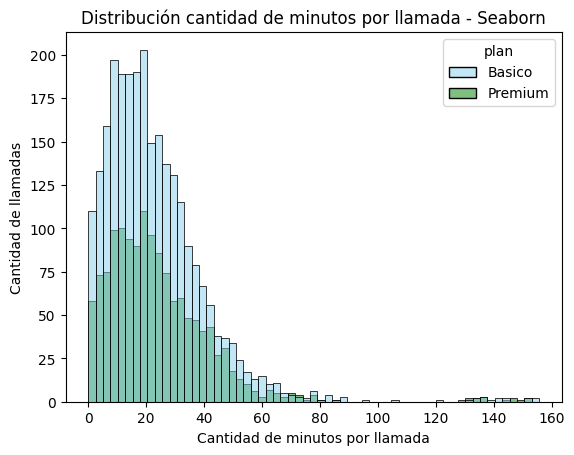

In [79]:
# Histograma para visualizar la cant_minutos_llamada
sns.histplot(data=user_profile, x='cant_minutos_llamada', hue='plan',palette=['skyblue','green'])
plt.title('Distribución cantidad de minutos por llamada - Seaborn')
plt.xlabel('Cantidad de minutos por llamada')
plt.ylabel('Cantidad de llamadas')
plt.show()


💡Insights: 
- La distribución de Cantidad de minutos por llamada presenta una distribución sesgada a la derecha (right-skewed), con muchas llamadas de pocos minutos (menos de 20 minutos, y unas pocas llamadas de muchos minutos (más de 100 minutos)
- La distribución entre los planes Básico y Premium es uniforme entre la cantidad de minutos por llamada, manteniéndose aproximadamente en un 50% para cada uno

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age` 
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

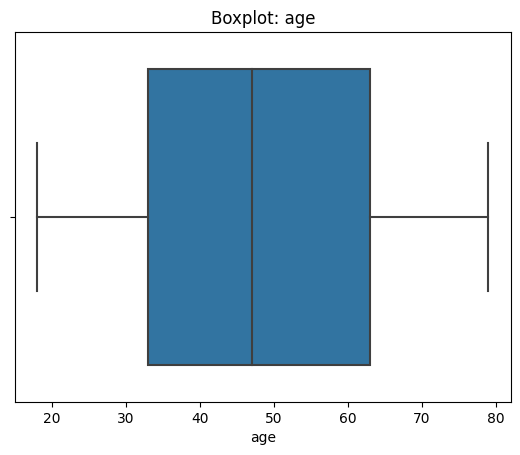

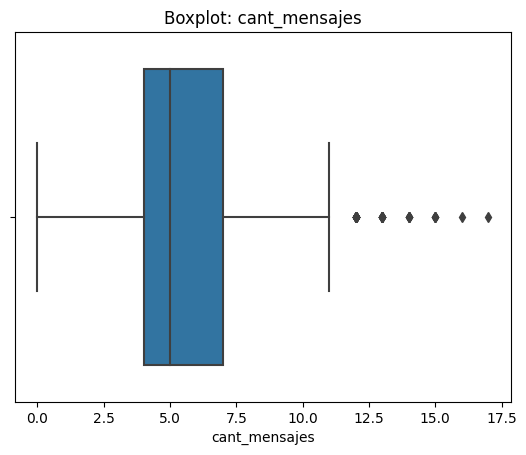

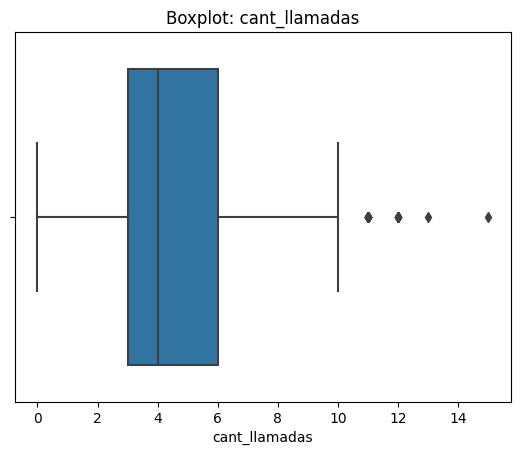

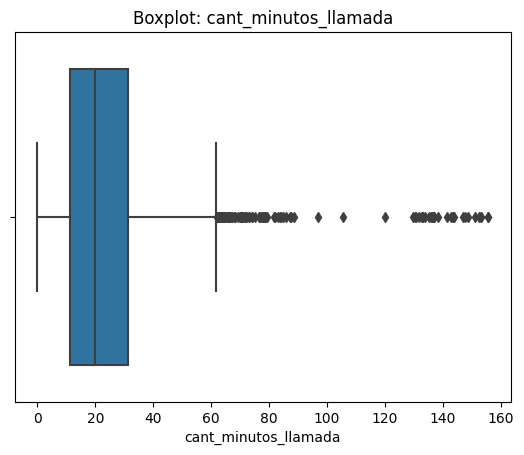

In [80]:
# Visualizando usando BoxPlot 


columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']


for col in columnas_numericas:
    sns.boxplot(data=user_profile,x=col)
    plt.title(f'Boxplot: {col}')
    plt.show()


💡Insights: 
- Age: no presenta outliers
- cant_mensajes: si presenta outliers
- cant_llamadas: si presenta outliers
- cant_minutos_llamada: si presenta outliers

In [81]:
# Calcular límites con el método IQR
columnas_limites = ['cant_mensajes','cant_llamadas','cant_minutos_llamada']
#calcular Q1, Q3 e IQR
for col in columnas_limites:
    Q1=user_profile[col].quantile(0.25)
    Q3=user_profile[col].quantile(0.75)
    IQR=Q3-Q1
    upper=Q3+1.5*IQR
    print(f'Upper {col}:', upper)

Upper cant_mensajes: 11.5
Upper cant_llamadas: 10.5
Upper cant_minutos_llamada: 61.8575


In [82]:
# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
user_profile[columnas_limites].describe()

,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,3999.000000,3999.000000,3999.000000
mean,5.524381,4.478120,23.317054
std,2.358416,2.144238,18.168095
min,0.000000,0.000000,0.000000
25%,4.000000,3.000000,11.120000
50%,5.000000,4.000000,19.780000
75%,7.000000,6.000000,31.415000
max,17.000000,15.000000,155.690000


💡Insights: 
- cant_mensajes: mantener o no outliers, porqué? Se mantienen. Distancia entre max y upper_limit es de 5,5 mensajes (17 - 11,5)
- cant_llamadas: mantener o no outliers, porqué? Se mantienen. Distancia entre max y upper_limit es de 4,5 (15 - 10,5)
- cant_minutos_llamada: mantener o no outliers, porqué? No se mantienen. Distancia entre max y upper_limit es de 94 (155 - 61). Tratamiento: se usa capping (winsorización) en p99 para análisis agregado.

In [83]:
#reemplazar
p99=user_profile['cant_minutos_llamada'].quantile(0.99)
min=user_profile['cant_minutos_llamada'].min()
user_profile['cant_minutos_llamada_winsor']=np.clip(user_profile['cant_minutos_llamada'],min,p99)
user_profile[['cant_minutos_llamada','cant_minutos_llamada_winsor']].describe()

,cant_minutos_llamada,cant_minutos_llamada_winsor
0,23.70,23.70
1,33.18,33.18
2,10.74,10.74
3,8.99,8.99
4,8.01,8.01


---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [ ]:
# Crear columna grupo_uso


In [ ]:
# verificar cambios
user_profile.head()

### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [ ]:
# Crear columna grupo_edad


In [ ]:
# verificar cambios
user_profile.head()

### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

In [ ]:
# Visualización de los segmentos por uso
sns.countplot(...)

plt.show()

In [ ]:
# Visualización de los segmentos por edad



---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:** 
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?


- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?  
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?  
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?


- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?

✍️ **Escribe aquí tu análisis ejecutivo:**

### Análisis ejecutivo

⚠️ **Problemas detectados en los datos**
- abc
- abc


🔍 **Segmentos por Edad**
- abc
- abc 


📊 **Segmentos por Nivel de Uso**
- abc
- abc


➡️ Esto sugiere que ...


💡 **Recomendaciones**
- abc
- abc 

---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`